In [14]:
# !pip install hmmlearn

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from hmmlearn import hmm
from exponentialhmm import ExponentialHMM
from hmmlearn.hmm import PoissonHMM
import pandas as pd
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
# np.set_printoptions(precision=2, suppress=True)

In [16]:
def real_world_data(timestep, random_state = 0,  n_components = 2, type = "exp"):

    # The start probability
    startprob = np.array([1.0, 0 ])
    # The transition matrix
    transmat = np.array([
        [0.8, 0.2],
        [0, 1]
        ])

    if type == "exp":
        # The means of each component
        lambdas = np.array([[1],
                        [1/20]
                        ])
        # Build an HMM instance and set parameters
        model = ExponentialHMM(n_components=n_components, random_state = random_state )

    elif type == "poisson":
        lambdas = np.array([[15],
                        [26]
                        ])
        model = PoissonHMM(n_components=2)
    
    else:
        raise NotImplementedError("Not implemented")

    # Instead of fitting it from the data, we directly set the estimated
    # parameters, the means and covariance of the components
    model.startprob_ = startprob
    model.transmat_ = transmat
    model.lambdas_ = lambdas

    # Generate samples
    X, Z = model.sample(timestep)

    return X, Z

In [17]:
X, Z = real_world_data(200, n_components = 2, type = "exp")

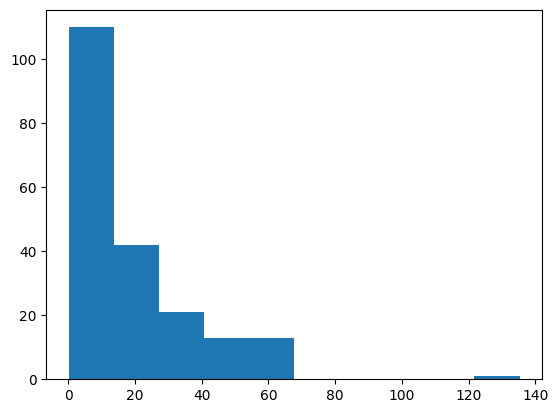

/var/folders/6d/sc9bzffn0p19tdnbbkt469lr0000gn/T/ipykernel_18410/719186038.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/6d/sc9bzffn0p19tdnbbkt469lr0000gn/T/ipykernel_18410/719186038.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


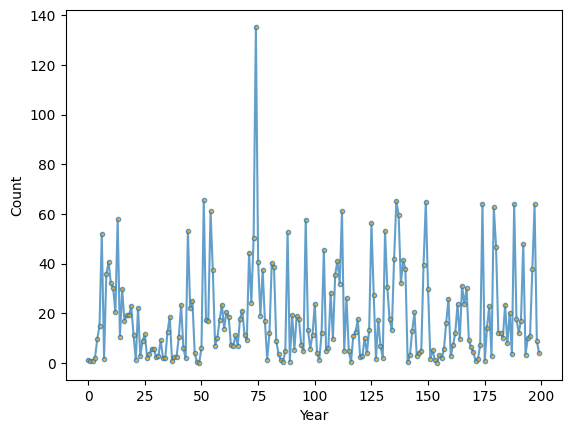

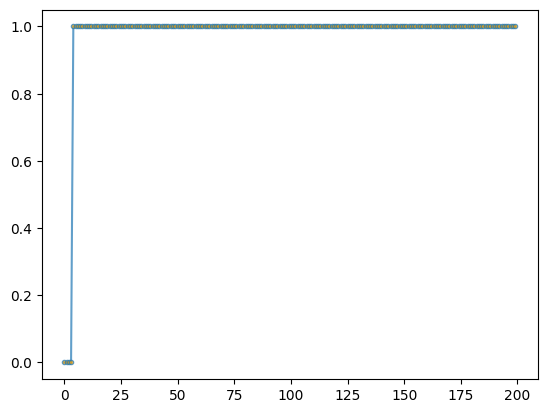

In [18]:
# Plot the sampled data
plt.hist(X)
plt.show()

fig, ax = plt.subplots()
ax.plot(X, ".-", ms=6, mfc="orange", alpha=0.7)
# ax.set_xticks(range(0, X.size, 10))
# ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()
fig, ax = plt.subplots()
ax.plot(Z, ".-", ms=6, mfc="orange", alpha=0.7)
fig.show()

In [19]:
from exponentialhmm import FixedExponentialHMM

def switching_model_fit(X, n_components = 2, type = "exp"):
      scores = list()
      models = list()

      for idx in range(20):  # ten different random starting states

            # define our hidden Markov model
            if type == "exp":

                  # Define the fixed parameters (i, j, value) where i is the row, j is the column, and value is the fixed value
                  fixed_transitions = [
                  (1, 0, 0.0),  
                  (1, 1, 1.0), 
                  ]

                  model = FixedExponentialHMM(n_components=n_components, 
                                              fixed_transitions=fixed_transitions,
                                              random_state=idx,
                                              n_iter=10)
            else:
                  raise NotImplementedError("Not implemented")
            
            model.fit(X)
            models.append(model)
            scores.append(model.score(X))
            print(f'Converged: {model.monitor_.converged}\t\t'
                  f'Score: {scores[-1]}')

      # get the best model
      model = models[np.argmax(scores)]
      print(f'The best model had a score of {max(scores)} and '
            f'{model.n_components} components')

      # use the Viterbi algorithm to predict the most likely sequence of states
      # given the model
      # states = model.predict(X)

      return model

In [20]:
model = switching_model_fit(X, n_components = 2, type = "exp")

Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129148
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129257
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129153
Converged: True		Score: -780.6259857228746
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129146
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855147664
Converged: True		Score: -780.6259855727312
Converged: True		Score: -785.7338293592343
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129147
Converged: True		Score: -785.7338293570958
Converged: True		Score: -785.7338293592343
Converged: True		Score: -780.6259855129148
Converged: True		Score: -785.7338293592343
Converged: True		Score: -785.7338293592343
The best model had a score of -780.6259855129146 and 2 components


In [21]:
print(model.transmat_)

[[0.71872381 0.28127619]
 [0.         1.        ]]


In [22]:
model.predict_proba(X[:100])[-1,:]

array([0., 1.])

In [23]:
predicted_proba = model.predict_proba(X[:101])[-1,:]

In [24]:
np.matmul(predicted_proba, model.transmat_)

array([0., 1.])

Text(0.5, 0, 'State')

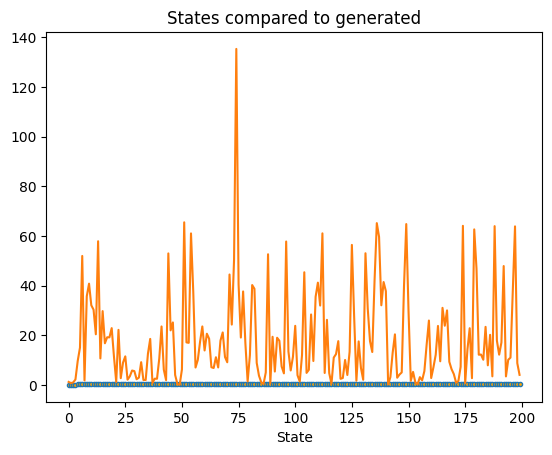

In [32]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[Z], ".-", ms=6, mfc="orange")
ax.plot(X)
ax.set_title('States compared to generated')
ax.set_xlabel('State')